## Logistic regression for stock price prediction


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
data : pd.DataFrame = yf.download("AAPL",start="2020-01-01",end="2024-12-31")
print(data)

/tmp/ipykernel_97899/3346231027.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data : pd.DataFrame = yf.download("AAPL",start="2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.538506   72.598884   71.292296   71.545882  135480400
2020-01-03   71.833282   72.594048   71.608677   71.765659  146322800
2020-01-06   72.405663   72.444306   70.702997   70.954173  118387200
2020-01-07   72.065155   72.671348   71.845377   72.415345  108872000
2020-01-08   73.224419   73.526310   71.768094   71.768094  132079200
...                ...         ...         ...         ...        ...
2024-12-23  254.367035  254.745680  252.553466  253.868804   40858800
2024-12-24  257.286682  257.296626  254.386957  254.586262   23234700
2024-12-26  258.103729  259.179926  256.718662  257.276679   27237100
2024-12-27  254.685883  257.784897  252.164833  256.917949   42355300
2024-12-30  251.307861  252.603266  249.862994  251.337754   35557500

[1257 rows x 5 colu

In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400
2020-01-03,71.833282,72.594048,71.608677,71.765659,146322800
2020-01-06,72.405663,72.444306,70.702997,70.954173,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


In [5]:
data.shape

(1257, 5)

In [6]:
data['price_change']=data['Close'].diff()
data['target']=(data['price_change'].shift(-1)>0).astype(int)
data['MA5']=data['Close'].rolling(window=5).mean()
data['MA10']=data['Close'].rolling(window=10).mean()
data['volume_change']=data['Volume'].pct_change()
data.dropna(inplace=True)


In [7]:
features = ['MA5','MA10','volume_change']
X=data[features]
y=data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [8]:
print("Accuracy : ", accuracy_score(y_test,y_pred))
print(f"Confustion matrix : \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification report : \n{classification_report(y_test,y_pred)}")

Accuracy :  0.548
Confustion matrix : 
[[  7 100]
 [ 13 130]]
Classification report : 
              precision    recall  f1-score   support

           0       0.35      0.07      0.11       107
           1       0.57      0.91      0.70       143

    accuracy                           0.55       250
   macro avg       0.46      0.49      0.40       250
weighted avg       0.47      0.55      0.45       250



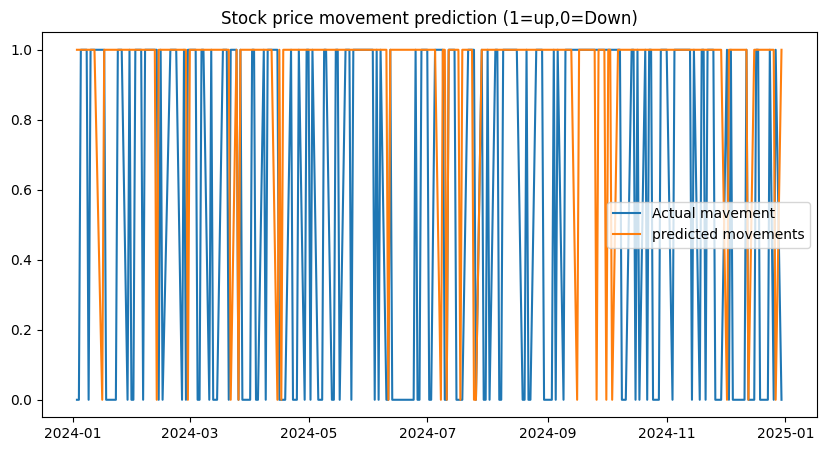

In [9]:
plt.figure(figsize=(10,5))
plt.plot(data.index[-len(y_test):],y_test.values,label="Actual mavement")
plt.plot(data.index[-len(y_test):],y_pred,label="predicted movements")
plt.legend()
plt.title("Stock price movement prediction (1=up,0=Down)")
plt.show()